In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"urja2007","key":"0b43659003cd96e7f480e7504df8a523"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d apollo2506/eurosat-dataset

Dataset URL: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset
License(s): CC0-1.0
 98% 2.01G/2.04G [00:12<00:00, 137MB/s] 
100% 2.04G/2.04G [00:12<00:00, 176MB/s]


In [4]:
!unzip eurosat-dataset.zip -d eurosat_data

Streaming output truncated to the last 5000 lines.
  inflating: eurosat_data/EuroSATallBands/River/River_1990.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1991.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1992.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1993.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1994.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1995.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1996.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1997.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1998.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1999.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_2.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_20.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_200.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_2000.tif  
  inflating: eurosat_data/EuroSATallBands/Riv

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models


from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.metrics import (confusion_matrix, classification_report,
accuracy_score)


DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 8
NUM_WORKERS = 0
IMG_SIZE = 64


print("Device:", DEVICE)

Device: cuda


In [7]:
DATASET_PATH = "/content/eurosat_data/EuroSAT"


transform = transforms.Compose([
transforms.Resize((64, 64)),
transforms.ToTensor()
])


dataset = datasets.ImageFolder(DATASET_PATH, transform=transform)
class_names = dataset.classes
NUM_CLASSES = len(class_names)


print("Total Images:", len(dataset))
print("Classes:", class_names)

Total Images: 27000
Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


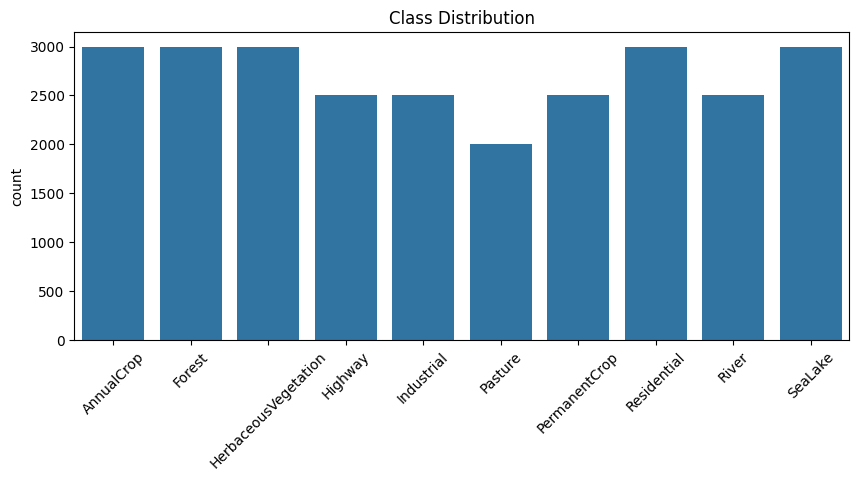

In [8]:
labels = [label for _, label in dataset]
plt.figure(figsize=(10,4))
sns.countplot(x=labels)
plt.xticks(range(NUM_CLASSES), class_names, rotation=45)
plt.title("Class Distribution")
plt.show()

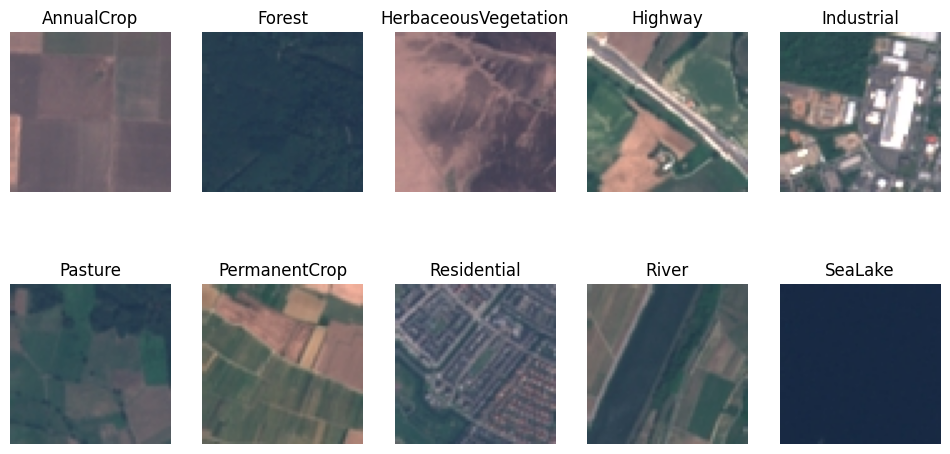

In [12]:
plt.figure(figsize=(12,6))
shown = set()
idx = 1
for img, label in dataset:
  if label not in shown:

    plt.subplot(2,5,idx)
    plt.imshow(img.permute(1,2,0))
    plt.title(class_names[label])
    plt.axis('off')
    shown.add(label)
    idx += 1
  if len(shown) == NUM_CLASSES:
    break
plt.show()

In [14]:
X = []
y = []


for img, label in tqdm(dataset):

  X.append(img.view(-1).numpy())
  y.append(label)


X = np.array(X)
y = np.array(y)
print("Flattened Shape:", X.shape)

100%|██████████| 27000/27000 [00:12<00:00, 2210.89it/s]


Flattened Shape: (27000, 12288)


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)

# ipca = IncrementalPCA(n_components=50, batch_size=256)
# X_ipca = ipca.fit_transform(X_std)


In [ ]:
from sklearn.decomposition import IncrementalPCA
import numpy as np
import matplotlib.pyplot as plt

components_list = list(range(1, 205, 1))  # YOU CONTROL THIS
explained_variances = []

print("="*60)
print("Finding Optimal n_components using Incremental PCA")
print("="*60)

for n_comp in components_list:
    print(f"\nRunning IPCA with n_components = {n_comp}")

    ipca = IncrementalPCA(
        n_components=n_comp,
        batch_size=256
    )

    X_ipca = ipca.fit_transform(X)

    cumulative_variance = np.sum(ipca.explained_variance_ratio_)
    explained_variances.append(cumulative_variance)

    print(f"→ Cumulative Explained Variance: {cumulative_variance:.4f}")

print("\nFinished IPCA sweep.")


Finding Optimal n_components using Incremental PCA

Running IPCA with n_components = 1
→ Cumulative Explained Variance: 0.6455

Running IPCA with n_components = 2
→ Cumulative Explained Variance: 0.6698

Running IPCA with n_components = 3
→ Cumulative Explained Variance: 0.6915

Running IPCA with n_components = 4
→ Cumulative Explained Variance: 0.7053

Running IPCA with n_components = 5
→ Cumulative Explained Variance: 0.7191

Running IPCA with n_components = 6
→ Cumulative Explained Variance: 0.7294

Running IPCA with n_components = 7
→ Cumulative Explained Variance: 0.7460

Running IPCA with n_components = 8
→ Cumulative Explained Variance: 0.7563

Running IPCA with n_components = 9
→ Cumulative Explained Variance: 0.7636

Running IPCA with n_components = 10
→ Cumulative Explained Variance: 0.7688

Running IPCA with n_components = 11
→ Cumulative Explained Variance: 0.7736

Running IPCA with n_components = 12
→ Cumulative Explained Variance: 0.7787

Running IPCA with n_components = 

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(components_list, explained_variances, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("IPCA Explained Variance vs Number of Components")
plt.grid(True)
plt.show()


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=components_list,
    y=explained_variances,
    mode='lines+markers',
    marker=dict(size=8),
    line=dict(width=2),
    hovertemplate=
        'n_components: %{x}<br>' +
        'Explained Variance: %{y:.4f}<extra></extra>'
))

fig.update_layout(
    title="IPCA Explained Variance vs Number of Components",
    xaxis_title="Number of PCA Components",
    yaxis_title="Cumulative Explained Variance",
    hovermode="closest",
    width=800,
    height=500
)

fig.show()


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_ipca[:,0], X_ipca[:,1], c=y, cmap='tab10', s=5)
plt.colorbar()
plt.title("IPCA Projection (PC1 vs PC2)")
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_ipca[:, 0],   # PC1
    X_ipca[:, 1],   # PC2
    X_ipca[:, 2],   # PC3
    c=y,
    cmap='tab10',
    s=5,
    alpha=0.8
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("IPCA 3D Projection (PC1 vs PC2 vs PC3)")

legend = fig.colorbar(scatter, ax=ax, shrink=0.6)
legend.set_label("Class Label")

plt.show()


In [ ]:
from sklearn.decomposition import IncrementalPCA
import numpy as np
import joblib
import gc

N_COMPONENTS = 2
BATCH_SIZE = 256

print("Fitting Incremental PCA...")

ipca = IncrementalPCA(
    n_components=N_COMPONENTS,
    batch_size=BATCH_SIZE
)

X_ipca = ipca.fit_transform(X)

print("Cumulative explained variance:",
      np.sum(ipca.explained_variance_ratio_))


In [15]:
ipca = IncrementalPCA(n_components=50, batch_size=256)
X_ipca = ipca.fit_transform(X)


print("Explained Variance Ratio:", np.sum(ipca.explained_variance_ratio_))

Explained Variance Ratio: 0.858243222689681


In [ ]:
SAVE_DIR = "/content"
os.makedirs(SAVE_DIR, exist_ok=True)

# Save PCA model
joblib.dump(ipca, f"{SAVE_DIR}/ipca_model.joblib")

# Save transformed features + labels
np.save(f"{SAVE_DIR}/X_ipca.npy", X_ipca)
np.save(f"{SAVE_DIR}/labels.npy", y)

print("Saved PCA model, features, and labels.")


In [ ]:
del X
del ipca
import gc
gc.collect()

print("RAM freed successfully.")


In [ ]:
import joblib
import numpy as np

SAVE_DIR = "./pca_cache"

ipca = joblib.load(f"{SAVE_DIR}/ipca_model.joblib")
X_ipca = np.load(f"{SAVE_DIR}/X_ipca.npy")
y = np.load(f"{SAVE_DIR}/labels.npy")

print("Reloaded PCA features:", X_ipca.shape)


In [ ]:
from sklearn.cluster import KMeans

NUM_SUPERCLASSES = 4

kmeans = KMeans(n_clusters=NUM_SUPERCLASSES, random_state=42)
super_labels = kmeans.fit_predict(X_ipca)

print("Superclass labels created.")
